
# Gravitational Waves | Visualization project | Samuel van Beek (11906782)


#### In this visualization project, strain due to an incoming gravitational wave is animated with time. The type of motion can be reduced to the following formulas:,
#### $h_+$ polarization: ,
#### $\delta x(t) = \frac{h_+}{2}x_0 \cos{\omega t}$,
#### $\delta y(t) = \frac{-h_+}{2}y_0 \cos{\omega t}$,
    
#### $h_\times$ polarization:,
#### $\delta x(t) = -\frac{h_\times}{2}y_0 \cos{\omega t}$ ,
#### $\delta y(t) = -\frac{h_\times}{2}x_0 \cos{\omega t}$ 

#### First of all, we import the required libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt    
import matplotlib.animation as anim  ## for animations

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150     ## set quality for animation

from IPython.display import HTML     ## needed to play the animation
## you need the ffmpeg package"

#### Now we are going to define a set of points which will be set in motion due to the incoming gravitational wave. We can choose between a circle or a grid of points. 

In [3]:
def set_of_points(n_points, shape='circle') :
    ## circle of radius 1.0
    if shape == 'circle' :
        theta = np.linspace(0,2*np.pi*(n_points - 1)/n_points, n_points) ## interval [0, 2pi)
        x = np.cos(theta)
        y = np.sin(theta)

    ## grid between -1 and 1 for x and y
    if shape == 'square' :
        xx = np.linspace(-1, 1, n_points)
        yy = np.linspace(-1, 1, n_points)
        xy = np.zeros((0,2))
        for i in range(0, n_points) :
            for j in range(0, n_points) :
                xy = np.r_[xy, [[xx[i], yy[j]]]]
                x = xy[:,0].flatten()
                y = xy[:,1].flatten()

    return x, y

n_points = 10
shape = 'circle'
x, y = set_of_points(n_points, shape)

#### We create the figure on which the set of points are drawn. 

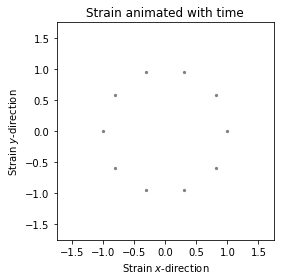

In [4]:
def make_figure() :
    fig, ax = plt.subplots()
    scat = ax.scatter(x, y, s = 5, c='grey')
    plt.xlim([-1.75, 1.75])
    plt.ylim([-1.75, 1.75])
    plt.title('Strain animated with time')
    plt.xlabel('Strain $x$-direction')
    plt.ylabel('Strain $y$-direction')
    plt.gca().set_aspect('equal', adjustable='box')
    return fig, ax, scat
    
fig, ax, scat = make_figure()

#### For the animation, we need a function that describes how the motion of the set of points evolves over time. We have defined the functions for $h_+$ and $h_\times$. In addition, another function is defined (called \"arbitrary\"), that enables us to try any formula that is desired. Please try!

#### Colors are given to the points. The larger the strain for a point, the more colored (red) it becomes. An unstrained point will be black."

In [5]:
# initialization of amplitude, omega and colors
amplitude = 0.2                                                ## = maximal strain/2
omega = 100                                                    ## = angular frequency
if (shape == 'square'): shape_factor = n_points                ## square has n_points**2 points
if (shape == 'circle'): shape_factor = 1                       ## circle has n_points**1 points
colors = np.ones((n_points*shape_factor,3))* (0,0,0)           ## colors for all points (black if unstrained)
max_rgb_value = np.ones((n_points*shape_factor,3))*(0.99,0,0)  ## rgb values are between 0 and 1

## h_+ polarization
def plus(t) :
    dx =  x*amplitude*np.cos(t * omega)             
    dy = -y*amplitude*np.cos(t * omega)
    scat.set_offsets(np.c_[x+dx, y+dy])
    colors[:,0] = np.minimum(max_rgb_value[:,0], np.sqrt(5*((dx[:])**2 + (dy[:])**2 )) )
    scat.set_facecolor(colors)
    return scat,   ## use a comma to return a tuple --> blit=True in anmimation possible, increasing quality 

## h_x polarization
def cross(t):
    dx = -y*amplitude*np.cos(t * omega)
    dy = -x*amplitude*np.cos(t * omega)
    scat.set_offsets(np.c_[x+dx, y+dy])
    colors[:,0] = np.minimum(max_rgb_value[:,0], np.sqrt(5*((dx[:])**2 + (dy[:])**2 )) )
    scat.set_facecolor(colors)
    return scat,

## arbitray function, feel free to change dx and dy!
def arbitrary(t):
    dx =  x*amplitude*np.cos(t * omega) + +y*amplitude*np.cos(t * omega)
    dy = -y*amplitude*np.sin(t * omega) + +x*amplitude*np.cos(t * omega)
    scat.set_offsets(np.c_[x+dx, y+dy])
    colors[:,0] = np.minimum(max_rgb_value[:,0], np.sqrt(5*((dx[:])**2 + (dy[:])**2 )) )
    scat.set_facecolor(colors)
    return scat,

## <font color='darkred'>Input cell</font>
#### The cell below determines the animation options, like the type of motion or the number of points. These are free to fill in.

In [6]:
shape                   = 'circle'        ## 'circle' or 'square'
number_of_points        = 400             ## circle: order 10-100, grid: 1-10
amplitude               = 0.3             ## for a clear animation use 0.1-0.3
omega                   = 40              ## frequency --> speed of animation (also framerate dependent)
straintype              = arbitrary       ## plus, cross or arbitrary (change in cell above)

#### The cell below will play the animation. The time and interval between frames can be adjusted to finetune the length and speed of the animation.

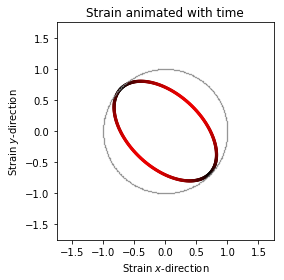

In [7]:
'''Parameters are used to recreate the points, and a new figure'''

x, y                    = set_of_points(number_of_points, shape)                  ## create set of points

if (shape == 'square'): shape_factor = number_of_points
if (shape == 'circle'): shape_factor = 1

colors                  = np.ones((number_of_points*shape_factor,3))* (0,0,0)     ## start with black, unstrained
max_rgb_value           = np.ones((number_of_points*shape_factor,3))* (0.99,0,0)

fig, ax, scat           = make_figure()                                           ## create figure

ax.scatter(x, y, s=0.15, c='grey', label='initial positions')

time                     = np.linspace(0,1,200)  ## time for animation and number of frames

interval_between_frames  = 100                   ## time between frames in milliseconds

animation1 = anim.FuncAnimation(fig, straintype, interval=interval_between_frames, frames=time, blit=True)  ## animating

HTML(animation1.to_html5_video())  ## to display animation in notebook

#### In the cell above the animation is played. The dots are colored red as a function of the distance to their original positions"